In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import stripROtools


# Explore UH DLC Micromegas - xHyL data at 540 Vmesh

In [4]:
# Location of data
file_loc = ["/Users/majdghrear/data/VMM3a_SRS/AUG23/UH_DLC/Po210/540Vmesh_bc_40p000_tac_60_ccs_6_cs_3_dt_200_mst_15_spc_1500_dp_400_cr_0p20-2p00_coin_center-of-mass_test.root", "/Users/majdghrear/data/VMM3a_SRS/AUG23/UH_DLC/Po210/540Vmesh_2_bc_40p000_tac_60_ccs_6_cs_3_dt_200_mst_15_spc_1500_dp_400_cr_0p20-2p00_coin_center-of-mass_test.root"]

#file_loc = ["/Users/majdghrear/data/VMM3a_SRS/AUG23/UH_NoDLC/Po210/540Vmesh_bc_40p000_tac_60_ccs_6_cs_3_dt_200_mst_15_spc_1500_dp_400_cr_0p20-2p00_coin_center-of-mass_test.root","/Users/majdghrear/data/VMM3a_SRS/AUG23/UH_NoDLC/Po210/540Vmesh_2_bc_40p000_tac_60_ccs_6_cs_3_dt_200_mst_15_spc_1500_dp_400_cr_0p20-2p00_coin_center-of-mass_test.root"]

# Create pandas data frame of the cluster info
df_cluster = stripROtools.read_root(file_loc, clusters=True, hits=False)

# Define additional columns

# number of hits
df_cluster["nhits"]=df_cluster.apply(lambda row: len(row.strips0)+len(row.strips1) ,axis=1)
df_cluster["electrons_x"] = df_cluster.adc0.apply(lambda x: 6240 * ( x  / 9.0 ) ) # 9 mV/fC is VMM gain setting for x channels, 170mV is the pedestal, 1200mV is th operating voltage 1024 is the number of possible ADC values
df_cluster["electrons_y"] = df_cluster.adc1.apply(lambda x: 6240 * ( x / 4.5 ) ) # 4.5 mV/fC is VMM gain setting for y channels, 170mV is the pedestal, 1200mV is th operating voltage 1024 is the number of possible ADC values
df_cluster["electrons"] = df_cluster.electrons_x + df_cluster.electrons_y

# length on x/y plane in units of strip lengths
df_cluster["L"]=np.sqrt((df_cluster.strips0.apply(np.max) - df_cluster.strips0.apply(np.min))**2 + (df_cluster.strips1.apply(np.max) - df_cluster.strips1.apply(np.min))**2)

# time range on x strips
df_cluster["TR0"] = df_cluster.times1.apply(np.max)-df_cluster.times1.apply(np.min)

# time range on y strips
df_cluster["TR1"] = df_cluster.times1.apply(np.max)-df_cluster.times1.apply(np.min)

#fiducialize clusters on s ingle vmmm combo in xHyL
df_cluster = stripROtools.fiducializeVMM(df_cluster, n_vmm_x=5, n_vmm_y=10, min_hits=5, map="UH")

Text(0, 0.5, 'hit count')

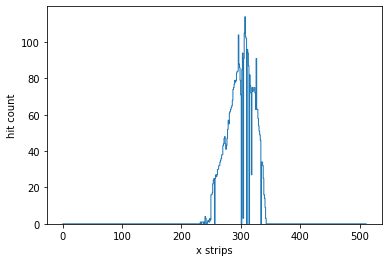

In [5]:
# plot the x hits
strip_edges = np.arange(-0.5,512.5,1.0)

plt.figure()
n,bins,patches = plt.hist(np.concatenate(df_cluster.strips0),bins=strip_edges,histtype='step')
bin_centers = (bins+(bins+1))/2
#plt.axvline(bin_centers[np.argmax(n)],color='k',label=str(int(bin_centers[np.argmax(n)])) )
plt.xlabel("x strips")
plt.ylabel("hit count")
#plt.legend()

Text(0, 0.5, 'hit count')

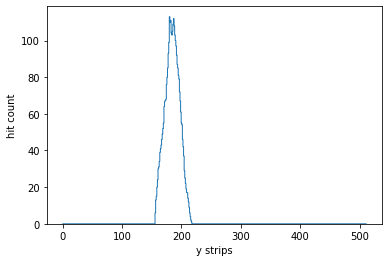

In [6]:
# plot the y hits

plt.figure()
n,bins,patches = plt.hist(np.concatenate(df_cluster.strips1),bins=strip_edges,histtype='step')
bin_centers = (bins+(bins+1))/2
#plt.axvline(bin_centers[np.argmax(n)],color='k',label=str(int(bin_centers[np.argmax(n)])) )
plt.xlabel("y strips")
plt.ylabel("hit count")
#plt.legend()

Text(0, 0.5, 'hit count')

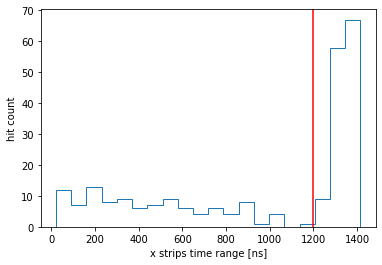

In [7]:
# Plot the time range in x, throughgoing alphas take up the largets time range

plt.figure()
plt.hist(df_cluster["TR0"],bins=20,histtype='step')
plt.axvline(1200, color='r')
plt.xlabel("x strips time range [ns]")
plt.ylabel("hit count")

Text(0, 0.5, 'hit count')

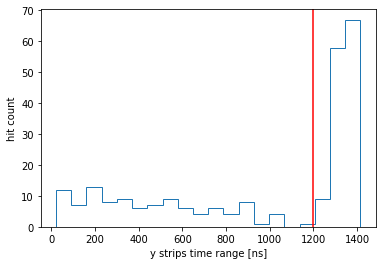

In [8]:
# Plot the time range in y, throughgoing alphas take up the largets time range

plt.figure()
plt.hist(df_cluster["TR1"],bins=20,histtype='step')
plt.axvline(1200, color='r')
plt.xlabel("y strips time range [ns]")
plt.ylabel("hit count")

Text(0, 0.5, 'count')

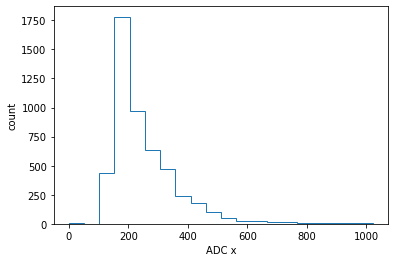

In [9]:
#Plot ADC x distribution
plt.hist(np.concatenate(df_cluster.adcs0), bins=20, histtype="step")
plt.xlabel("ADC x")
plt.ylabel("count")

Text(0, 0.5, 'count')

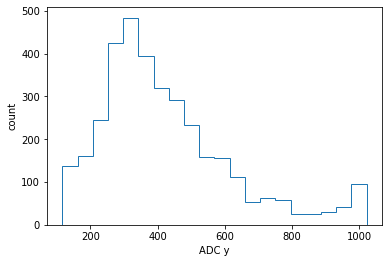

In [10]:
#Plot ADC y distribution
plt.hist(np.concatenate(df_cluster.adcs1), bins=20, histtype="step")
plt.xlabel("ADC y")
plt.ylabel("count")

In [11]:
# Cut for throughgoing events  with over 8 hits that are within 25 degrees of vertical
df_cut = df_cluster.loc[ (df_cluster.TR0 > 1200) & (df_cluster.TR1 > 1200) & (df_cluster.nhits > 8) & (df_cluster.L <= 28) ]
df_cut=df_cut.reset_index(drop=True)

print("Number of remaining events: ", len(df_cut) )

Number of remaining events:  49


Text(0, 0.5, 'hit count')

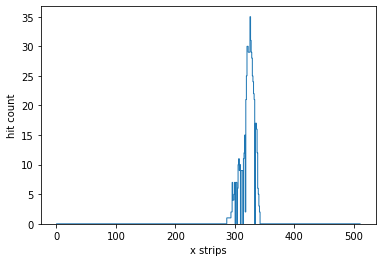

In [12]:
# Plot x hits

plt.figure()
n,bins,patches = plt.hist(np.concatenate(df_cut.strips0),bins=strip_edges,histtype='step')
bin_centers = (bins+(bins+1))/2
#plt.axvline(bin_centers[np.argmax(n)],color='k',label=str(int(bin_centers[np.argmax(n)])) )
plt.xlabel("x strips")
plt.ylabel("hit count")
#plt.legend()

Text(0, 0.5, 'hit count')

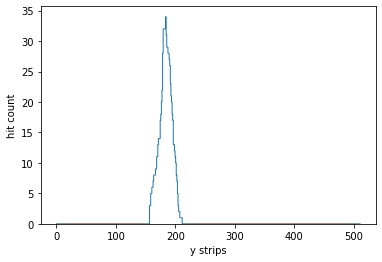

In [13]:
# plot y hits
plt.figure()
n,bins,patches = plt.hist(np.concatenate(df_cut.strips1),bins=strip_edges,histtype='step')
bin_centers = (bins+(bins+1))/2
#plt.axvline(bin_centers[np.argmax(n)],color='k',label=str(int(bin_centers[np.argmax(n)])) )
plt.xlabel("y strips")
plt.ylabel("hit count")
#plt.legend()

[1300. 1250. 1175. 1100. 1025.  950.  875.  725.  650.  575.  500.  425.
  350.  275.  125.   75.    0.]


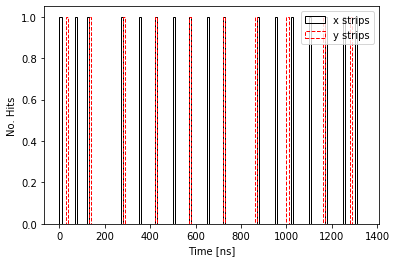

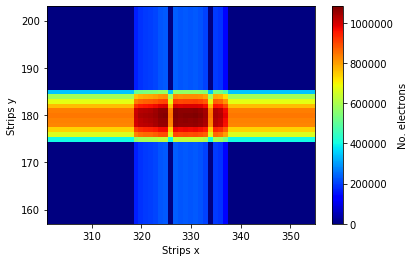

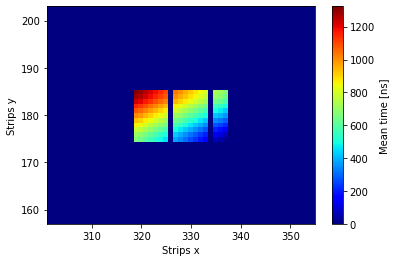

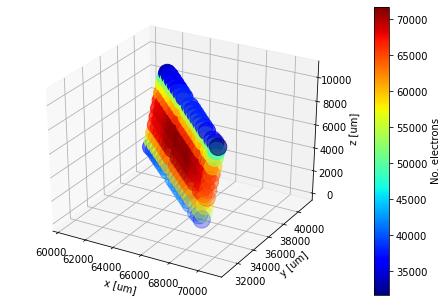

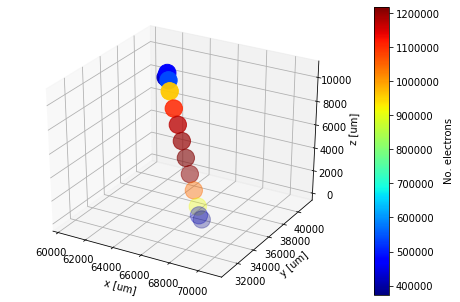

In [39]:
# Look at a single event after the cut
test_event = df_cut.iloc[3]
# Make a TrackTools object for the event
dsp = stripROtools.TrackTools(event = test_event, gain_x=9, gain_y=4.5, v_drift=8.0)

# Remove delayed hits (as discussed in the slides)
dsp.prune_track(T_L = 40, T_H=250)
dsp.prune_track2(gap=2)

# Plot 1D time display
dsp.TimeHistView( t_bin =10)

# Plot 2D displays of charge and time
dsp.Strip2DView(fullview = False)
dsp.Strip2DView_times(fullview = False)

# Plot 3D displays
dsp.Reconst3D_v0()
x,y,z,c = dsp.Reconst3D_v1( mu = -6.68, sigma = 16.4 , n_sigma = 3)

In [30]:
    def prune_track(self, T_L = 40, T_H=250):

        # For each x hit, compute the time difference to its neighboring strip on the left and right hand side
        Txdiff = np.absolute(np.diff(self.times_x))
        Txdiff_L = np.append(Txdiff[0],Txdiff)
        Txdiff_R = np.append(Txdiff,Txdiff[-1])
        # For each x hit, compute the distance (in strips) to the neighboring strip on the left and right hand side
        Sxdiff = np.absolute(np.diff(self.strips_x))
        Sxdiff_L = np.append(Sxdiff[0],Sxdiff)
        Sxdiff_R = np.append(Sxdiff,Sxdiff[-1])

        # Now find the minimum of time/strips on the left vs right hand side
        xdiff = np.minimum(Txdiff_L/Sxdiff_L,Txdiff_R/Sxdiff_R)

        # For each y hit, compute the time difference to its neighboring strip on the left and right hand side
        Tydiff = np.absolute(np.diff(self.times_y))
        Tydiff_L = np.append(Tydiff[0],Tydiff)
        Tydiff_R = np.append(Tydiff,Tydiff[-1])
        # For each x hit, compute the distance (in strips) to the neighboring strip on the left and right hand side
        Sydiff = np.absolute(np.diff(self.strips_y))
        Sydiff_L = np.append(Sydiff[0],Sydiff)
        Sydiff_R = np.append(Sydiff,Sydiff[-1])

        # Now find the minimum of time/strips on the left vs right hand side
        ydiff = np.minimum(Tydiff_L/Sydiff_L,Tydiff_R/Sydiff_R)

        # Use min time/strip to remove bad hits
        self.strips_x = self.strips_x[ (xdiff>T_L) & (xdiff<T_H)]
        self.strips_y = self.strips_y[ (ydiff>T_L) & (ydiff<T_H)]
        self.ADC_x = self.ADC_x[ (xdiff>T_L) & (xdiff<T_H)]
        self.ADC_y = self.ADC_y[ (ydiff>T_L) & (ydiff<T_H)]
        self.times_x = self.times_x[ (xdiff>T_L) & (xdiff<T_H)]
        self.times_y = self.times_y[ (ydiff>T_L) & (ydiff<T_H)]

In [31]:
# Make max diffs plot

all_diffs = []


for i in range(len(df_cut)):

    try:
        test_event = df_cut.iloc[i]

        dsp = stripROtools.TrackTools(event = test_event, gain_x=9, gain_y=4.5, v_drift=8.0)
        dsp.prune_track(T_L = 40, T_H=250)

        diffs = np.diff(dsp.strips_x)
        diffs_L = np.append(diffs[0],diffs)
        diffs_R = np.append(diffs,diffs[0])

        min_diffs = np.minimum(diffs_L,diffs_R)

        all_diffs = np.append(all_diffs,min_diffs)

    except:
        pass


Text(0, 0.5, 'Count')

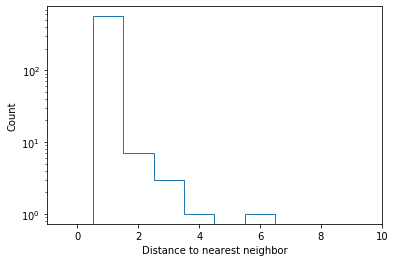

In [32]:
plt.hist(all_diffs,bins=np.arange(-0.5,10.5,1.0),histtype="step")
plt.yscale("log")
plt.xlabel("Distance to nearest neighbor")
plt.ylabel("Count")

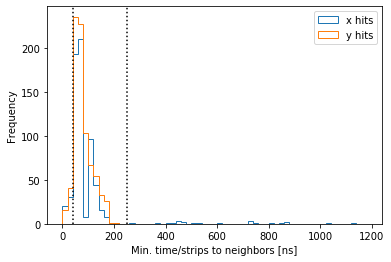

In [33]:
# Make the track pruning plot

max_diffs = []

xdiffs = np.array([])
ydiffs = np.array([])

for i in range(len(df_cut)):
    test_event = df_cut.iloc[i]

    dsp = stripROtools.TrackTools(event = test_event, gain_x=9, gain_y=4.5, v_drift=8.0)

    # For each x hit, compute the time difference to its neighboring strip on the left and right hand side
    Txdiff = np.absolute(np.diff(dsp.times_x))
    Txdiff_L = np.append(Txdiff[0],Txdiff)
    Txdiff_R = np.append(Txdiff,Txdiff[-1])
    # For each x hit, compute the distance (in strips) to the neighboring strip on the left and right hand side
    Sxdiff = np.absolute(np.diff(dsp.strips_x))
    Sxdiff_L = np.append(Sxdiff[0],Sxdiff)
    Sxdiff_R = np.append(Sxdiff,Sxdiff[-1])

    # Now find the minimum of time/strips on the left vs right hand side
    xdiff = np.minimum(Txdiff_L/Sxdiff_L,Txdiff_R/Sxdiff_R)

    # Append to array of xdiffs
    xdiffs = np.append(xdiffs,xdiff)

    # For each y hit, compute the time difference to its neighboring strip on the left and right hand side
    Tydiff = np.absolute(np.diff(dsp.times_y))
    Tydiff_L = np.append(Tydiff[0],Tydiff)
    Tydiff_R = np.append(Tydiff,Tydiff[-1])
    # For each x hit, compute the distance (in strips) to the neighboring strip on the left and right hand side
    Sydiff = np.absolute(np.diff(dsp.strips_y))
    Sydiff_L = np.append(Sydiff[0],Sydiff)
    Sydiff_R = np.append(Sydiff,Sydiff[-1])

    # Now find the minimum of time/strips on the left vs right hand side
    ydiff = np.minimum(Tydiff_L/Sydiff_L,Tydiff_R/Sydiff_R)

    # Append to array of xdiffs
    ydiffs = np.append(ydiffs,ydiff)

plt.hist(xdiffs, bins = np.arange(0,1200,20), histtype="step",label="x hits")
plt.hist(ydiffs, bins = np.arange(0,1200,20), histtype="step",label="y hits")
plt.axvline(250, linestyle=":",color="k")
plt.axvline(40, linestyle=":",color="k")
plt.xlabel("Min. time/strips to neighbors [ns]")
plt.ylabel("Frequency")
plt.legend()



In [186]:
def get_ErrVecs(x_vals,y_vals,z_vals,charges):

    X = np.array([x_vals,y_vals,z_vals]).T

    # 1) Center on barycenter
    # Barycenter is the charge-weighted mean position
    x_b = np.sum(X*(charges.reshape(len(charges),1)),axis=0)/np.sum(charges)
    # Shift data to barycenter
    X = X-x_b

    # 2) Find principle axis
    # Use charges for weights
    W = charges.reshape(len(charges),1)
    # Compute weighted covariance matrix
    WCM = ( (W*X).T @ X ) / np.sum(W)
    U1,S1,D1 =  np.linalg.svd(WCM)
    v_PA = np.array([D1[0][0],D1[0][1],D1[0][2]])

    v_PA = np.sign(v_PA[2]) * v_PA

    # projection of mean-centered position onto principle axis
    proj = np.array([(X@v_PA)*v_PA[0],(X@v_PA)*v_PA[1],(X@v_PA)*v_PA[2]]).T

    # Mismeasurement vectors
    # The distribution of the x and y values gives us sigma x and sigma y
    err =X-proj

    return x_vals,y_vals,z_vals,charges,v_PA,x_b,err
    

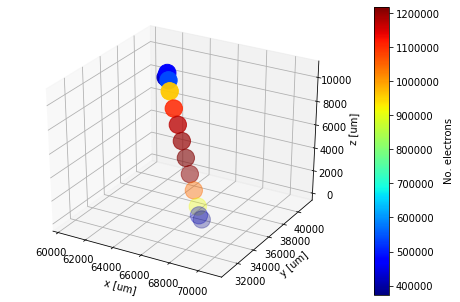

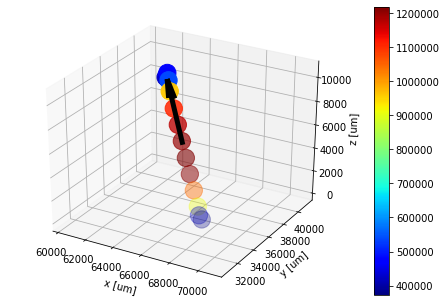

In [187]:
import matplotlib.pyplot as plt
import matplotlib.cm as cmx
import matplotlib
from mpl_toolkits.mplot3d import Axes3D

test_event = df_cut.iloc[3]

# Make a TrackTools object for the event
dsp = stripROtools.TrackTools(event = test_event, gain_x=9, gain_y=4.5, v_drift=8.0)

# Remove delayed hits (as discussed in the slides)
dsp.prune_track(T_L = 40, T_H=250)
dsp.prune_track2(gap=2)

x_vals,y_vals,z_vals,charges = dsp.Reconst3D_v1( mu = -6.68, sigma = 16.4 , n_sigma = 3)

x_vals,y_vals,z_vals,weights,direction,start, err = get_ErrVecs( x_vals,y_vals,z_vals,charges)
direction = 5000*direction

# Plot the 3D scatter
fig = plt.figure()
ax = Axes3D(fig)

#set color map
cm = plt.get_cmap('jet')
cNorm = matplotlib.colors.Normalize(vmin=min(weights), vmax=max(weights))
scalarMap = cmx.ScalarMappable(norm=cNorm, cmap=cm)
                
ax.scatter(x_vals, y_vals, z_vals, c=scalarMap.to_rgba(weights),s=300)
ax.quiver(start[0],start[1],start[2],direction[0],direction[1],direction[2], linewidths=5, color = 'k')
scalarMap.set_array(weights)
fig.colorbar(scalarMap)

# Force all axis to have equal limits
extents = np.array([getattr(ax, 'get_{}lim'.format(dim))() for dim in 'xyz'])
sz = extents[:,1] - extents[:,0]
centers = np.mean(extents, axis=1)
maxsize = max(abs(sz))
r = maxsize/2
for ctr, dim in zip(centers, 'xyz'):
    getattr(ax, 'set_{}lim'.format(dim))(ctr - r, ctr + r)

# Set labels
ax.set_xlabel('x [um]')
ax.set_ylabel('y [um]')
ax.set_zlabel('z [um]')
                
plt.show()

# Perform point res analysis

In [150]:

all_z = np.array([])
all_x_err = np.array([])
all_y_err = np.array([])

for indx in range(len(df_cut)):

    try:

        event = df_cut.iloc[indx]

        # Make a TrackTools object for the event
        dsp = stripROtools.TrackTools(event = event, gain_x=9, gain_y=4.5, v_drift=8.0)

        # Remove delayed hits (as discussed in the slides)
        dsp.prune_track(T_L = 40, T_H=250)
        dsp.prune_track2(gap=2)
        x,y,z,c = dsp.Reconst3D_v1( mu = -6.68, sigma = 16.4 , n_sigma = 3, plot = False)

        # Only consider tracks with 5 or more points
        if len(x) > 5:

            # Get error vectors
            x_vals,y_vals,z_vals,weights,direction,start, err = get_ErrVecs( x,y,z,c)

            x_errs = err[:,0]
            y_errs = err[:,1]

            all_z = np.append(all_z,z_vals)
            all_x_err = np.append(all_x_err,x_errs)
            all_y_err = np.append(all_y_err,y_errs)
            

        
    except:
        pass

In [154]:
# Switch to cm
all_z = all_z*1E-4

In [156]:
np.max(all_z)

1.0986884399414063

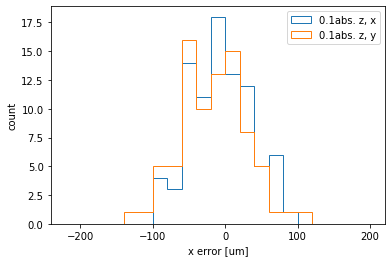

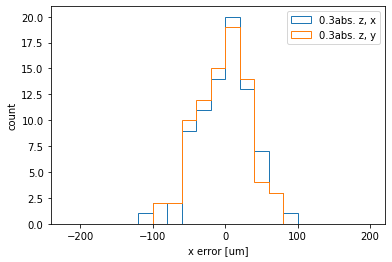

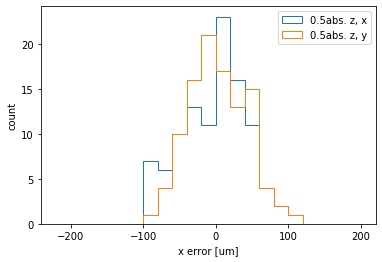

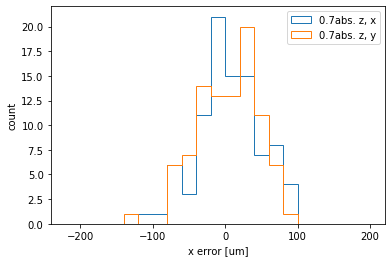

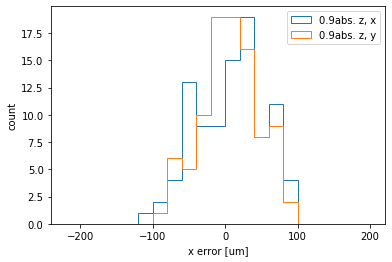

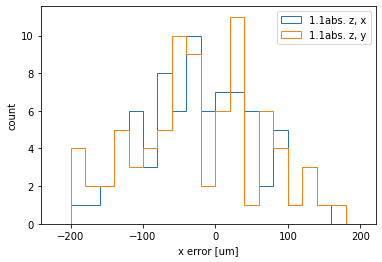

In [185]:


for z_low in np.arange(0,1.2,0.2):

    z_high = z_low + 0.2

    #make data cut
    data_cut = (all_z > z_low) & (all_z < z_high)

    plt.figure()
    plt.hist(all_x_err[data_cut], bins = np.arange(-220,220,20),histtype="step", label = str( round(z_low+0.1,2) )+"abs. z, x")
    plt.hist(all_y_err[data_cut], bins = np.arange(-220,220,20),histtype="step", label = str( round(z_low+0.1,2) )+"abs. z, y")
    plt.xlabel("x error [um]")
    plt.ylabel("count")
    plt.legend()
    plt.plot()